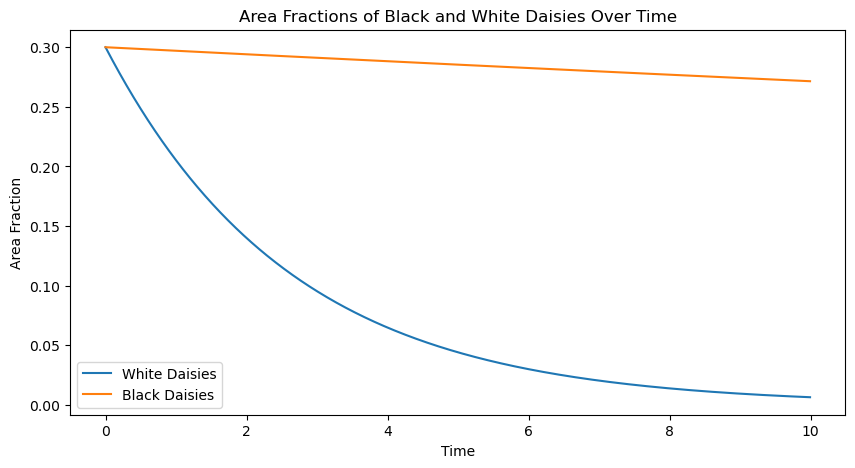

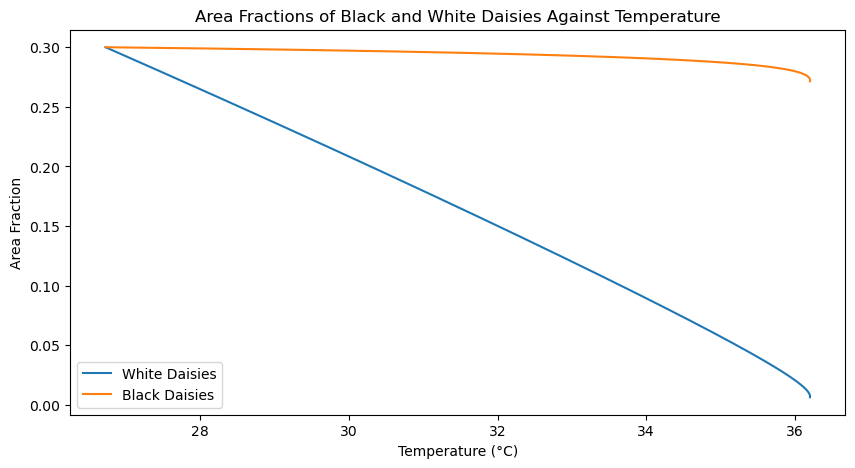

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
S = 917  # Solar constant (W/m^2)
L = 1.0  # Luminosity factor (scaling for incoming radiation)
sigma = 5.67e-8  # Stefan-Boltzmann constant (W/m^2/K^4)
aw = 0.75  # Albedo of white daisies
ab = 0.25  # Albedo of black daisies
ag = 0.5   # Albedo of bare ground
gamma_w = 0.1  # Initial death rate for white daisies
gamma_b = 0.1  # Initial death rate for black daisies

# Initial conditions
Aw = 0.3  # Initial area fraction of white daisies
Ab = 0.3  # Initial area fraction of black daisies
dt = 0.01  # Time step
num_steps = 1000  # Number of time steps

# Arrays to store values over time
time_array = np.zeros(num_steps)
Aw_array = np.zeros(num_steps)
Ab_array = np.zeros(num_steps)
Te_array = np.zeros(num_steps)

#test
Ti = 22.5 #initial ideal temperature
Topt = 33 #optimal temperature for black daisy to evolve
m = 1
r = Topt - Ti

# Main simulation loop
for t in range(num_steps):
    # Calculate planetary albedo
    ap = Aw * aw + Ab * ab + (1 - Aw - Ab) * ag
    
    # Update planetary temperature based on new albedo formula
    Te = (L * (S / sigma) * (1 - ap)) ** 0.25
    
    # Store current values
    time_array[t] = t * dt
    Aw_array[t] = Aw
    Ab_array[t] = Ab
    Te_array[t] = Te - 273.15  # Convert temperature to Celsius
    
    # Update death rates based on temperature
    gamma_b = max(0.01, 0.1 - 0.001 * (Te - 22.5))
    gamma_w = max(0.01, 0.1 + 0.001 * (Te - 22.5))
    
    # Growth rates (parabolic, simplified for now)
    growth_w = max(0, 1 - 0.003265 * (Te - 22.5)**2)
    growth_b = max(0, m * (1 - ((Topt - Te) / r) ** 2))
    
    # Update areas of daisies
    dAw = (growth_w * Aw - gamma_w * Aw) * dt
    dAb = (growth_b * Ab - gamma_b * Ab) * dt
    Aw += dAw
    Ab += dAb
    
    # Keep area fractions between 0 and 1
    Aw = max(0, min(1, Aw))
    Ab = max(0, min(1, Ab))

# Plot results

# 1. Plot of area fractions against time
plt.figure(figsize=(10, 5))
plt.plot(time_array, Aw_array, label="White Daisies")
plt.plot(time_array, Ab_array, label="Black Daisies")
plt.xlabel("Time")
plt.ylabel("Area Fraction")
plt.title("Area Fractions of Black and White Daisies Over Time")
plt.legend()
plt.show()

# 2. Plot of area fractions against temperature
plt.figure(figsize=(10, 5))
plt.plot(Te_array, Aw_array, label="White Daisies")
plt.plot(Te_array, Ab_array, label="Black Daisies")
plt.xlabel("Temperature (°C)")
plt.ylabel("Area Fraction")
plt.title("Area Fractions of Black and White Daisies Against Temperature")
plt.legend()
plt.show()
